<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/PSD_histogram_BEST_sample_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
Repetir = 60

In [3]:
# New version change routine inside MarquesGabi_Routines
# Try to improve segmentation 
# New routine is called Segment_Filter_revisited_One... Two,Three, etc
# this exemple threshold 0.4


In [4]:
#!pip install mahotas

In [5]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [6]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/Doutorado


In [7]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [8]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines


In [10]:
# Sample7 =[2, 5, 17] # 
# [2, 5, 17] sample 7---  [4,13,25] sample 3----[0, 3, 9] sample 8

In [11]:
FILE='SugarSample07.zip'
img_name=[]
x_original = [] 

data_file ='csv'


file_name = zipfile.ZipFile(FILE, 'r')
file_name.extractall()

k = 0
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:] == data_file):
        df_ImgJ =pd.read_csv(name)
        if( k > 0):
          df_old = df_ImgJ.copy()
        #df_ImgJ = pd.read_excel(name)
        df_ImgJ =pd.read_csv(name)
        df_ImgJ = df_ImgJ.drop(labels=[0], axis=0)
        if(k > 0):
          df_ImgJ = pd.concat( [df_ImgJ, df_old], ignore_index = True)
        k = k + 1

In [12]:
df_ImgJ.head()

,,Area,Mean,Min,Max,Major,Minor,Angle,Feret,FeretX,FeretY,FeretAngle,MinFeret
0,2,1.662,255,255,255,1.552,1.363,73.598,1.676,1459,452,77.989,1.372
1,3,1.104,255,255,255,1.412,0.995,28.297,1.464,1560,393,32.838,0.949
2,4,0.721,255,255,255,1.155,0.795,85.374,1.145,836,418,82.117,0.781
3,5,1.361,255,255,255,1.473,1.176,86.059,1.603,1154,296,116.844,1.176
4,6,1.332,255,255,255,1.363,1.244,61.471,1.574,957,409,21.448,1.161


In [13]:
name

'Amostra 07 foto 04.csv'

In [14]:
f.namelist()

['Amostra 07 foto 02.csv', 'Amostra 07 foto 03.csv', 'Amostra 07 foto 04.csv']

In [15]:
#df_ImgJ.head()

In [16]:
#df_ImgJ.head()

In [17]:
from Segment_Filter_Revival import Segmenta  # got image provided segmented

In [18]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [19]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [20]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [21]:
Img_Size = 28

In [22]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [23]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 6s 310ms/step - loss: 0.5565 - accuracy: 0.7230 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 2s 187ms/step - loss: 0.2814 - accuracy: 0.9038 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 137ms/step - loss: 0.2295 - accuracy: 0.9184 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 134ms/step - loss: 0.1295 - accuracy: 0.9592 - val_loss: 0.6938 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 136ms/step - loss: 0.0828 - accuracy: 0.9767 - val_loss: 0.6946 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 2s 138ms/step - loss: 0.0627 - accuracy: 0.9738 - val_loss: 0.6958 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 2s 138ms/step - loss: 0.0624 - accuracy: 0.9796 - val_loss: 0.6977 - val_accuracy: 0.5102

In [24]:
Y_test = yback(Y_test)

In [25]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        62  10
1         1  74


In [26]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92        72
           1       0.88      0.99      0.93        75

    accuracy                           0.93       147
   macro avg       0.93      0.92      0.92       147
weighted avg       0.93      0.93      0.92       147



In [27]:
pred_test

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [28]:
'''
img=ww[4] 
df=Segmenta(img)
df.shape
'''

'\nimg=ww[4] \ndf=Segmenta(img)\ndf.shape\n'

In [29]:
Sample3 =[4,13,25]
Sample7 =[2, 5, 17]
Sample8 =[0, 3, 9]

for i in range(Repetir):
  k = 0
  for i in Sample7:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [30]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,127.523621,119.986755,110.374275,98.689034,95.532600,91.934776,90.489120,91.674370,96.190445,101.189026,103.924850,107.728256,108.712662,107.911621,106.694702,106.338829,106.421059,105.060478,84.083168,9.536861,1.551985,0.294423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.858688,107.886108,101.118141,97.173439,95.903107,93.718330,93.514648,94.467850,99.807175,107.037323,108.087418,111.888466,...,75.711243,24.811434,0.246692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,148.263214,147.168228,148.999985,150.039215,150.561432,154.212662,161.675323,164.008957,164.844971,161.550552,134.425797,90.087425,74.407837,73.824661,75.143188,77.032608,72.329857,28.411150,0.628072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,129.249054,123.136223,110.701683,100.728645,104.051140,103.200829,98.841858,98.140579,97.349991,95.405739,94.744225,94.917824,98.266884,102.670906,106.706581,105.202286,108.469025,114.697075,116.557419,110.814781,105.955757,105.742775,108.412872,109.480644,112.068443,113.198845,113.947418,114.433884,130.779236,129.884003,129.475113,120.480789,105.385002,99.560188,97.388298,96.536400,97.957733,100.417244,97.973450,94.735252,...,104.678177,99.254204,98.488716,104.192513,108.418030,110.242836,110.832214,109.411957,101.836182,99.290009,96.391998,95.607475,72.889954,67.571152,71.891396,69.570099,70.421989,67.333862,59.996834,75.974648,110.622147,111.704727,110.074257,99.704071,104.423447,103.699707,100.789146,106.236893,100.844109,68.758224,70.034760,102.091309,109.092094,112.092751,111.336113,110.047966,105.798927,102.683060,100.658890,97.676979
2,147.805557,141.833328,133.750000,125.750000,121.638893,120.444443,120.694443,119.138893,120.500000,120.027779,119.250000,122.555557,130.611115,137.555557,137.555557,129.611115,69.361115,0.472222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.111115,139.333328,132.583328,125.250000,114.416664,112.361115,112.611115,111.333336,113.111115,118.416664,118.055557,112.888893,...,9.805555,1.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.111115,99.416664,94.972221,88.361115,47.527779,52.666668,77.611115,87.972221,90.861115,91.361115,88.833336,88.194443,86.194443,87.027779,79.666664,54.250000,18.500000,1.388889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,188.904861,169.556091,125.413986,68.856743,21.755386,10.171939,11.054126,15.565423,21.852699,25.320667,29.186680,31.571274,29.226061,21.081282,3.423115,0.555196,0.014269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,128.110474,63.712105,23.043377,11.671582,10.573650,19.068205,29.651985,35.219357,38.051037,38.854362,37.970036,36.636002,...,0.847753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,171.261597,156.991348,151.928040,152.336884,154.159821,157.982117,153.829147,141.246033,81.727180,38.704685,32.755527,32.046753,33.245895,33.227444,28.263590,8.770701,0.577598,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,105.431343,113.937897,118.636642,118.948814,119.215134,118.892212,117.902885,117.081795,119.389343,119.896751,113.172966,122.118828,143.124435,138.511871,131.788651,133.608109,137.913452,137.128906,137.485306,137.427628,135.395264,131.057556,126.970276,125.885445,126.190628,124.904282,121.557610,117.650887,104.368103,113.451042,119.745926,121.891739,123.902771,125.569473,126.754517,127.688110,128.573318,128.846710,128.280441,128.149612,...,145.352875,135.483795,117.841270,123.4

In [31]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [32]:
#df_ann

In [33]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [34]:
img_graos.shape

(57, 785)

In [35]:
prediction

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [36]:
img_graos.shape

(57, 785)

In [37]:
Width=np.array(Width_new)

In [38]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_Revival import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [39]:

#!git clone https://github.com/ucfilho/marquesgabi_out_2020
#%cd marquesgabi_out_2020
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

PSD_imageJ = 'Amostra7.csv' 
PSD_new = pd.read_csv(PSD_imageJ, sep=';')
print(PSD_new.head(3))
''''''

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines
   Id   Area
0   1  1.387
1   2  1.626
2   3  1.336


''

In [40]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [41]:
Width.shape

(57,)

In [42]:
Width

array([155, 105, 139, 133, 133, 103, 153, 175, 105, 114, 109, 105, 159,
       154, 140, 200, 109, 183, 162, 195, 159, 168, 149, 121, 110, 115,
       185, 106, 129, 153, 193, 106, 108, 144, 132, 126, 153, 111, 180,
       121, 124, 162, 153, 159, 137, 163, 193, 186, 117, 177, 148, 123,
       133, 193, 195, 121, 173])

In [43]:
img_graos.shape

(57, 785)

In [44]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
5,155.0,152.651749,151.504852,152.165604,154.906647,155.124725,157.262482,161.335953,163.273849,167.416214,164.746490,131.978317,79.518883,77.064812,78.062355,75.370911,67.147224,56.275295,53.300148,52.776157,53.338737,53.748764,53.602585,53.327953,61.099358,89.507553,97.350464,100.344818,100.320511,161.493637,160.406830,159.765991,157.610519,155.386612,157.523392,162.896652,169.469070,168.806915,155.468658,90.389801,...,1.284953,0.973278,0.897149,0.873424,1.045536,1.163913,2.219230,8.331697,22.104975,36.469933,53.592175,66.071426,1.000000,1.016233,1.039958,1.959917,5.593423,13.707889,20.395756,24.165911,13.437378,2.715796,1.586264,0.647575,0.591550,0.522706,1.000000,0.962705,0.530323,0.150385,0.533028,0.074256,0.251779,0.671342,0.638710,0.992841,1.383476,1.323788,3.436504,8.973653
6,105.0,164.377792,168.413361,172.040024,175.382217,177.995575,179.515579,180.177795,182.311127,179.155579,169.511124,143.075577,67.155556,49.644447,52.604450,53.906673,52.840008,52.875557,53.480003,56.026672,58.311115,59.306671,64.275558,73.582230,82.782234,89.995560,95.222237,98.146675,101.844452,168.368896,171.835571,174.048920,178.368896,183.160019,183.755569,185.128906,186.551132,182.426697,172.177795,141.600006,...,103.288902,105.013351,108.520012,112.120003,115.684448,120.271126,124.222237,127.573341,129.453339,133.826675,137.951126,138.271133,69.053345,47.720005,48.808895,51.128891,52.084450,54.875561,55.808899,54.173340,59.213341,89.044456,114.124451,121.902237,122.853348,119.688904,114.586678,111.528900,110.595566,113.564453,115.008896,116.368904,119.000015,124.564453,127.342239,128.435562,132.235565,141.195557,144.280014,143.515564
8,139.0,67.404327,68.320633,71.238281,75.779045,79.534851,85.058578,87.080429,87.868576,87.289062,86.506798,84.538681,87.196625,104.923859,120.018730,122.167992,119.289062,118.545517,120.397385,121.157440,122.379219,124.437912,130.094971,132.972626,131.245071,129.487396,128.551514,134.912323,150.886444,69.169968,72.880333,75.809273,79.213654,83.418503,88.396706,91.440865,92.909515,92.133423,89.874634,88.157341,...,83.908531,93.076691,105.685570,124.656113,134.214050,133.451691,135.885406,144.871582,149.152054,152.718964,158.802231,161.691208,63.966614,64.955078,66.111641,66.159569,67.824127,69.723831,72.901039,73.288292,66.837532,63.748768,63.267223,63.352203,62.558037,60.615391,59.587597,57.674755,67.781219,83.344284,109.181458,130.116913,132.431335,131.657578,128.711975,133.313293,138.099731,138.898865,148.540955,163.085434
11,133.0,93.313019,93.939064,91.459831,93.986145,97.675903,91.664818,48.623268,28.529087,70.980606,87.008308,96.398888,106.476456,115.567863,121.623260,122.709137,124.476440,124.429359,124.362885,125.875351,126.252075,131.900284,139.235458,140.559555,140.304703,139.351807,137.739609,133.886414,123.836571,94.166214,95.135735,95.199440,99.720230,101.199448,94.213310,54.168972,49.576180,87.855957,95.872566,100.088638,...,45.941830,67.698067,82.479225,87.094193,89.603882,91.969528,90.024925,91.315796,89.019394,88.487541,87.637123,86.168976,93.387817,93.260391,92.872574,92.412750,91.196671,91.939056,92.440445,94.662048,102.163437,104.778397,86.706375,29.565098,41.069252,39.844875,35.983383,33.263157,43.941830,58.972298,71.991692,80.495842,85.875351,86.800560,87.409973,88.955673,88.714676,87.030472,86.290863,83.160675
14,133.0,129.731308,125.371193,123.171745,118.844879,118.108032,118.019394,119.318558,116.221603,113.678665,111.916908,107.991684,105.049858,107.855957,114.819946,120.606644,119.099724,111.462608,86.559555,56.811634,52.933521,56.623268,58.717457,58.914127,55.362877,64.451523,106.385048,125.013855,132.282547,124.950142,119.360107,118.634354,118.240990,115.914124,114.429359,114.343498,114.282562,112.044327,110.

In [45]:
PSD_new['Area']

0      1.387
1      1.626
2      1.336
3      0.640
4      2.211
       ...  
97     1.297
98     2.949
99     1.090
100    1.444
101    1.524
Name: Area, Length: 102, dtype: float64

In [46]:
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]



In [47]:
len(Diameter_All)

57

In [48]:
#

#PSD_new['Area'].shape

In [49]:
#PSD_new.iloc[:,0]

In [50]:
Area2 = PSD_new['Area'].values
#k = 0
for A in Area2:
  Diam1.append((4*A/np.pi)**0.5)
  #k = k + 1 


In [51]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [52]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188
0,1.454690,1.185604,0.958126,1.316389,1.302288,1.149618,1.305706,1.207418,1.475547,1.381977,1.152384,1.560675,1.438849,1.269615,1.680111,1.145736,1.292474,1.903586,1.490144,1.134568,1.209526,1.155143,1.339876,0.973942,1.643332,1.342724,1.338450,1.570029,1.251433,1.269615,1.543035,1.917581,1.284569,1.118747,1.047632,1.065706,1.210578,1.978046,1.078178,1.213729,...,1.800817,1.573674,1.429973,2.105569,1.495262,1.362024,1.540558,1.522685,1.293459,1.477703,1.136811,1.308628,1.269113,1.532271,1.333208,1.507558,1.468628,1.341301,1.31977,1.677456,1.147401,1.319287,1.572865,1.132884,1.276117,1.417902,1.355934,1.546744,1.366224,1.656067,1.511354,2.002356,1.54839,1.467761,1.216872,1.285065,1.937726,1.178062,1.355934,1.392989
1,1.146558,0.660159,0.811419,1.066154,0.922383,0.657085,0.877700,1.546398,0.958567,0.882859,0.731044,0.787679,1.133518,1.012531,1.055676,1.329701,0.828926,1.377554,0.977568,1.384827,1.186564,1.102089,1.074368,0.834049,0.877764,0.968188,1.098303,0.736619,0.774260,1.028363,1.477582,0.685861,0.832309,1.074624,0.732173,0.872066,0.861978,0.884388,1.238189,0.840857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
len(Diameter_All)

57

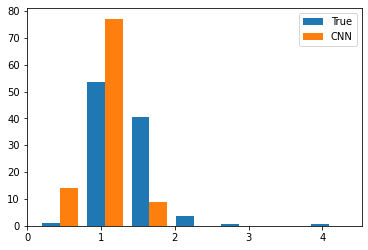

In [54]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [55]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.3931484341131954 desvio= 0.3634548348598306 pontos= 189


In [56]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 1.0181290944338406 desvio= 0.23287344105477173 pontos= 57
